<a href="https://colab.research.google.com/github/hramac/Employee-Attrition-Analysis/blob/main/INST_737_Final_Project_HR_Analytics_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The primary objective of this project is to leverage HR analytics using the R programming language to gain insights into employee attrition patterns and identify key factors influencing turnover.**

**Step 1: Data Collection**

The HR Analytics Dataset, sourced from Kaggle, contains comprehensive information on employee demographics, performance metrics, and attrition status.
With approximately 15,000 employee observations and 10 features, the dataset provides a rich source of information for analysis.

In [ ]:
# Upload the analytics CSV file to Google Colab

# Once the file is uploaded, read it directly into a dataframe
data_set <- read.csv('HR_Analytics.csv', header = TRUE)

In [ ]:
# Check to see if there are any missing values in the data and summary of the data contained in the specified data set.
summary(data_set)


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:0.00000      
 Max.   :10.000     Max.  

**Step 2: Data Cleaning**

Handling missing values, outliers, and inconsistencies to prepare the data for analysis.

In [ ]:
# Data overview

# Install the plyr package if it's not already installed
install.packages("plyr")

# Load the plyr package for data manipulation functions
library(plyr)

# Renaming dataset variables for clarity and consistency
# Renaming the variable 'sales' to 'role' for better clarity
data_set <- rename(data_set, c("sales" = "role"))

# Renaming the variable 'time_spend_company' to 'exp_in_company' for better clarity
data_set <- rename(data_set, c("time_spend_company" = "exp_in_company"))

# Renaming the 10th variable to 'salary' for better clarity
names(data_set)[10] <- "salary"

# Displaying the first few rows of the dataset after renaming variables
head(data_set)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,exp_in_company,Work_accident,left,promotion_last_5years,role,salary
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.11,0.88,7,272,4,0,1,0,sales,medium
4,0.72,0.87,5,223,5,0,1,0,sales,low
5,0.37,0.52,2,159,3,0,1,0,sales,low
6,0.41,0.50,2,153,3,0,1,0,sales,low


**Step 3: Data Exploration**

Performing EDA to understand the underlying patterns and relationships.

**3a. Statistical Overview**

The dataset has:

About 15,000 employee observations and 10 features
The company has a turnover rate of about 24%
Mean satisfaction of employees is 0.61

In [ ]:
# The dataset contains 10 columns and 14999 observations
dim(data_set)

[1] 14999    10

In [ ]:
# Check the type of our features
str(data_set)

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ exp_in_company       : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ role                 : chr  "sales" "sales" "sales" "sales" ...
 $ salary               : chr  "low" "medium" "medium" "low" ...


In [ ]:
# About 76% of employees stayed and 24% of employees left

# Creating a factor variable 'attrition' indicating whether an employee left (1) or stayed (0)
attrition <- as.factor(data_set$left)

# Summarizing the 'attrition' variable to get counts of employees who left (1) and stayed (0)
summary(attrition)

# Calculating the percentage of attrition rate
perc_attrition_rate <- sum(data_set$left / length(data_set$left)) * 100

# Printing the percentage of attrition rate
print(perc_attrition_rate)

0     1 
11428  3571

[1] 23.80825


In [ ]:
# Overview of summary (Turnover V.S. Non-turnover)
cor_vars<-data_set[,c("satisfaction_level","last_evaluation","number_project","average_montly_hours","exp_in_company","Work_accident","left","promotion_last_5years")]

aggregate(cor_vars[,c("satisfaction_level","last_evaluation","number_project","average_montly_hours","exp_in_company","Work_accident","promotion_last_5years")], by=list(Category=cor_vars$left), FUN=mean)

Category,satisfaction_level,last_evaluation,number_project,average_montly_hours,exp_in_company,Work_accident,promotion_last_5years
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.6668096,0.7154734,3.786664,199.0602,3.380032,0.17500875,0.026251313
1,0.4400980,0.7181126,3.855503,207.4192,3.876505,0.04732568,0.005320638


**3b. Correlation Matrix & Heatmap**

**Moderate Positively Correlated Features:**

projectCount vs evaluation: 0.349333

projectCount vs averageMonthlyHours: 0.417211

averageMonthlyHours vs evaluation: 0.339742

**Moderate Negatively Correlated Feature:**

satisfaction vs turnover: -0.388375

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



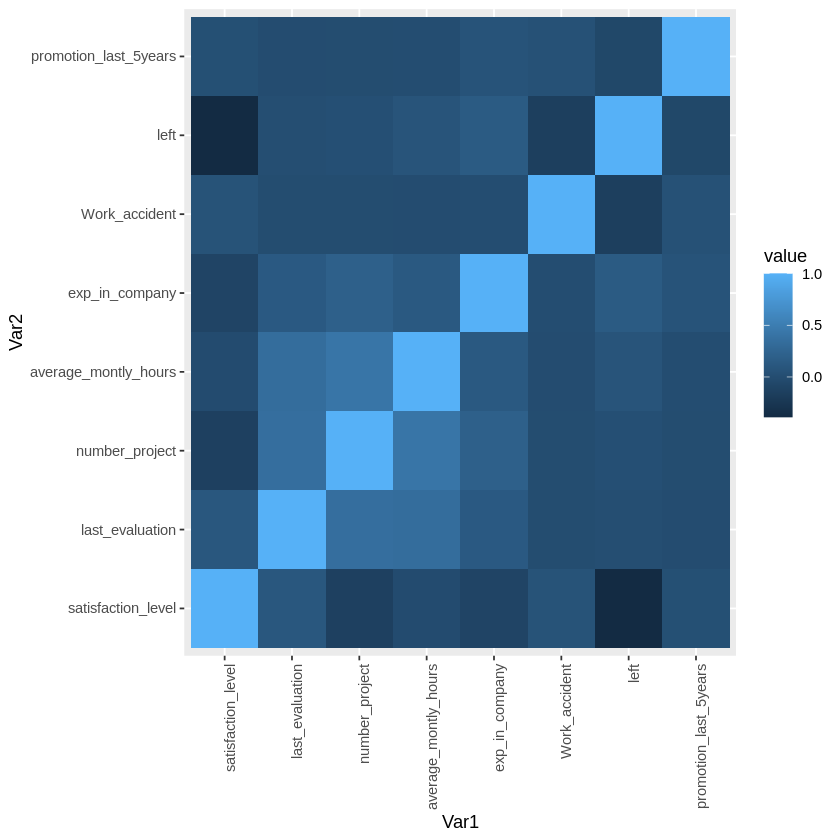

In [ ]:
# Correlation Matrix

# Install the reshape2 package if not already installed
install.packages("reshape2")

# Load the reshape2 package for data manipulation
library(reshape2)

# Load the ggplot2 package for data visualization
library(ggplot2)

# Selecting variables for correlation analysis
cor_vars <- data_set[, c("satisfaction_level", "last_evaluation", "number_project",
                         "average_montly_hours", "exp_in_company", "Work_accident",
                         "left", "promotion_last_5years")]

# Calculate the correlation matrix
cor_matrix <- cor(cor_vars)

# Reshape the correlation matrix for visualization
melted_cormat <- melt(cor_matrix)

# Create a heatmap of the correlation matrix using ggplot
ggplot(data = melted_cormat, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate x-axis labels for better readability

**Summary:**

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. This could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

**3b2. Statistical Test for Correlation**


**One-Sample T-Test (Measuring Satisfaction Level)**
A one-sample t-test checks whether a sample mean differs from the population mean. Let's test to see whether the average satisfaction level of employees that had a turnover differs from the entire employee population.

**Hypothesis Testing:** Is there significant difference in the means of satisfaction level between employees who had a turnover and the entire employee population?

**Null Hypothesis (H0: pTS = pES):** There is no difference in satisfaction level between employees who had turnover and the entire employee population.

**Alternate Hypothesis (HA: pTS != pES):** There is a difference in satisfaction level between employees who had turnover and the entire employee population.


In [ ]:
# Let's compare the means of employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction <-mean(data_set$satisfaction_level)
left_pop<-subset(data_set,left==1)

emp_turnover_satisfaction <-mean(left_pop$satisfaction_level)

print( c('The mean for the employee population is: ', emp_population_satisfaction) )
print( c('The mean for the employees that had a turnover is: ' ,emp_turnover_satisfaction) )

[1] "The mean for the employee population is: "
[2] "0.612833522234816"                        
[1] "The mean for the employees that had a turnover is: "
[2] "0.440098011761411"                                  


**Conducting the T-Test**

Let's conduct a t-test at 95% confidence level and see if it correctly rejects the null hypothesis that the sample comes from the same distribution as the employee population.

In [ ]:
t.test(left_pop$satisfaction_level,mu=emp_population_satisfaction) # Employee Population satisfaction mean


	One Sample t-test

data:  left_pop$satisfaction_level
t = -39.109, df = 3570, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0.6128335
95 percent confidence interval:
 0.4314385 0.4487576
sample estimates:
mean of x 
 0.440098 


**T-Test Result**

The test result shows the test statistic "t" is equal to -39.109. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

**T-Test Quantile**

If the t-statistic value we calculated above (-39.109) is outside the quantiles, then we can reject the null hypothesis.

In [ ]:
#degress of freedom
dof<-sum(as.numeric(data_set$left))

LQ <-qt(0.025,dof)  # Left Quartile

RQ <-qt(0.975,dof)  # Right Quartile

print (c('The t-distribution left quartile range is: ',LQ))
print (c('The t-distribution right quartile range is: ' ,RQ))

[1] "The t-distribution left quartile range is: "
[2] "-1.96062852159556"                          
[1] "The t-distribution right quartile range is: "
[2] "1.96062852159556"                            


**One-Sample T-Test Summary**

T-Test = -39.109 | P-Value = 9.01e-279 | Reject Null Hypothesis
Reject the null hypothesis because:

T-Test score is outside the quantiles
P-value is lower than confidence level of 5%
Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean satisfaction of employees who had a turnover and the entire employee population. The super low P-value of 9.012e-279 at a 5% confidence level is a good indicator to reject the null hypothesis.

**3c. Distribution Plots (Satisfaction - Evaluation - AverageMonthlyHours)**


Let's analyze the distribution of certain employee features:

**Satisfaction:** The distribution reveals two prominent spikes, indicating clusters of employees with both low and high satisfaction levels.

**Evaluation:** A bimodal distribution is observed, with peaks for employees receiving low evaluations (below 0.6) and high evaluations (above 0.8).

**Average Monthly Hours:** Similar to evaluation, this feature also exhibits a bimodal distribution, suggesting two groups of employees with lower (below 150 hours) and higher (above 250 hours) average monthly hours.

Interestingly, there's a correlation between evaluation and average monthly hours. Employees with lower average monthly hours tend to receive fewer evaluations, and vice versa.

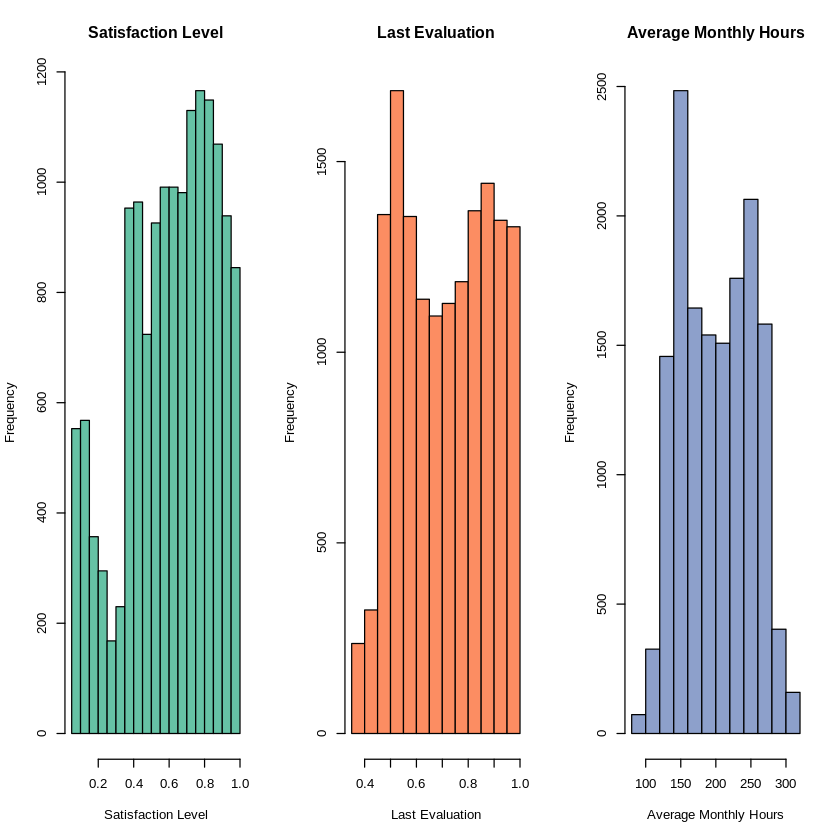

In [ ]:
# Set up the plotting layout to display histograms in a 1x3 grid
par(mfrow = c(1, 3))

# Plot histogram of satisfaction_level variable with visually appealing color
hist(data_set$satisfaction_level, col = "#66c2a5", main = "Satisfaction Level", xlab = "Satisfaction Level")

# Plot histogram of last_evaluation variable with visually appealing color
hist(data_set$last_evaluation, col = "#fc8d62", main = "Last Evaluation", xlab = "Last Evaluation")

# Plot histogram of average_montly_hours variable with visually appealing color
hist(data_set$average_montly_hours, col = "#8da0cb", main = "Average Monthly Hours", xlab = "Average Monthly Hours")



**3d. Salary V.S. Turnover**

Summary:
*   The majority of employees who left the company had either low or medium salaries.
*   Very few employees who left had high salaries.
*   It appears that employees with low to average salaries are more likely to leave the company






    Var1 Var2 Freq
1   high    0 1155
2    low    0 5144
3 medium    0 5129
4   high    1   82
5    low    1 2172
6 medium    1 1317


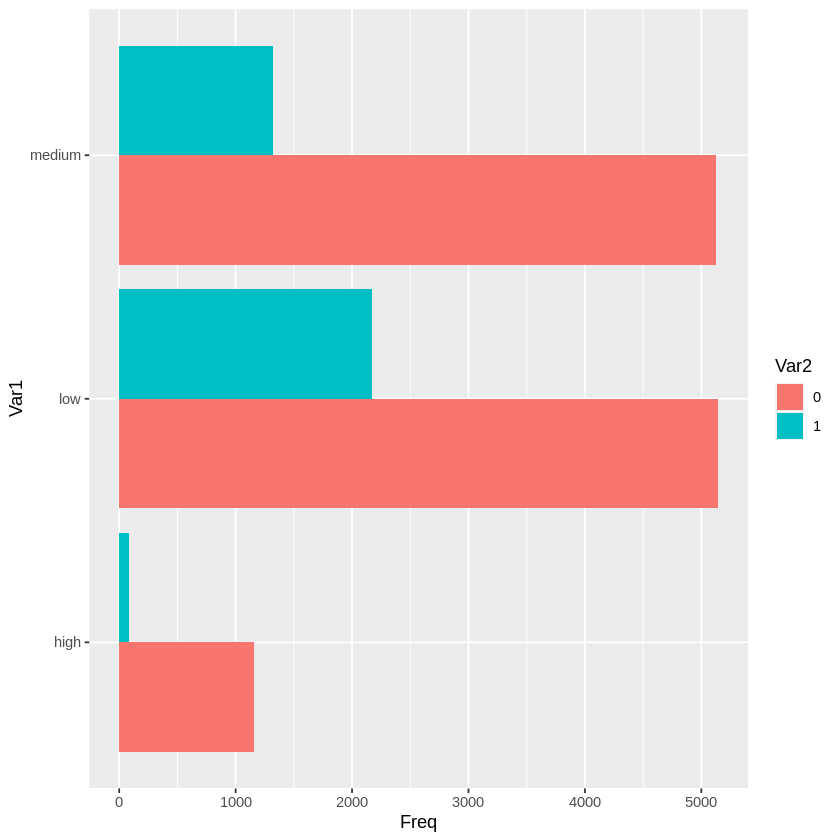

In [ ]:
# Create a contingency table of salary and attrition status
vis_1 <- table(data_set$salary, data_set$left)

# Convert the table to a data frame for visualization
d_vis_1 <- as.data.frame(vis_1)

# Print the data frame to view the contingency table
print(d_vis_1)

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a grouped bar plot using ggplot
p <- ggplot(d_vis_1, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(position = "dodge", stat = 'identity') +   # Use dodge position for grouped bars
  coord_flip()  # Flip the coordinates to make the plot horizontal

# Print the grouped bar plot
print(p)


**3e. Department V.S. Turnover**

Summary:
*   The sales, technical, and support departments experienced the highest employee turnover rates.
*   In contrast, the management department had the lowest turnover rate.




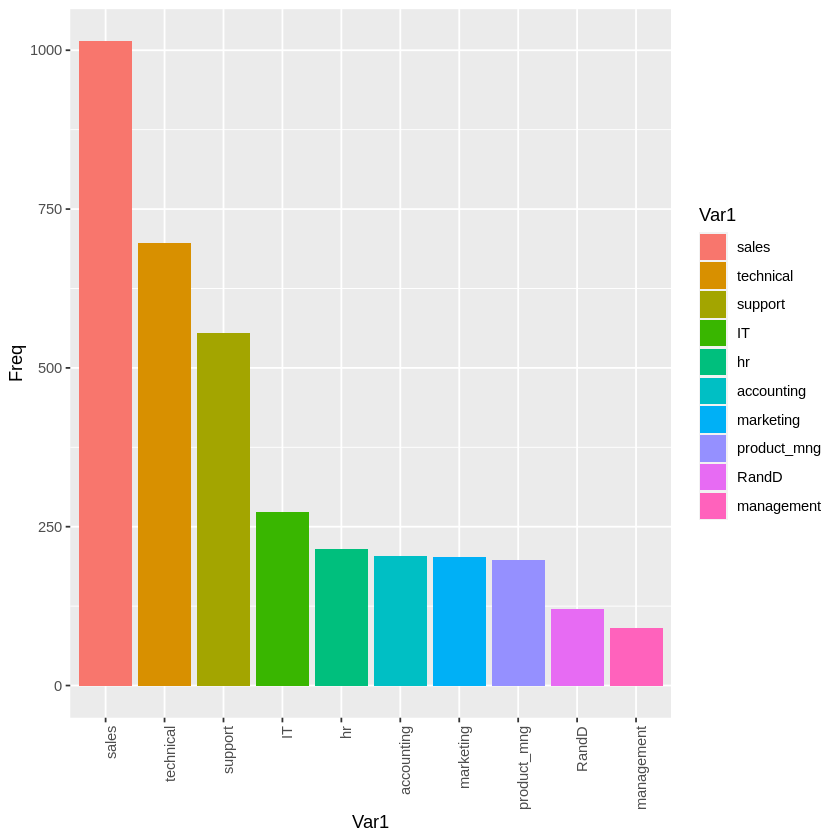

In [ ]:
# Create a contingency table of role and attrition status
vis_2 <- table(data_set$role, data_set$left)

# Convert the table to a data frame for visualization
d_vis_2 <- as.data.frame(vis_2)

# Subset the data frame to include only rows where employees left (attrition status = 1)
d_vis_2 <- subset(d_vis_2, Var2 == 1)

# Load the ggplot2 package for data visualization
library(ggplot2)

# Reorder the factor levels of Var1 based on frequency of attrition
d_vis_2$Var1 <- factor(d_vis_2$Var1, levels = d_vis_2$Var1[order(-d_vis_2$Freq)])

# Create a bar plot showing the frequency of attrition for each role
p <- ggplot(d_vis_2, aes(x = Var1, y = Freq, fill = Var1)) +
  geom_bar(stat = 'identity') +   # Use identity stat for the bar heights
  theme(axis.text.x = element_text(angle = 90, hjust = 1))  # Rotate x-axis labels for better readability

# Print the bar plot
print(p)


**3f. Turnover V.S. ProjectCount**

Summary:
*   More than half of the employees with 2, 6, and 7 projects left the company.
*   The majority of employees who remained with the company had 3, 4, and 5 projects.
*   Interestingly, all employees with 7 projects left the company.
*   There appears to be an upward trend in employee turnover rate as project count increases.





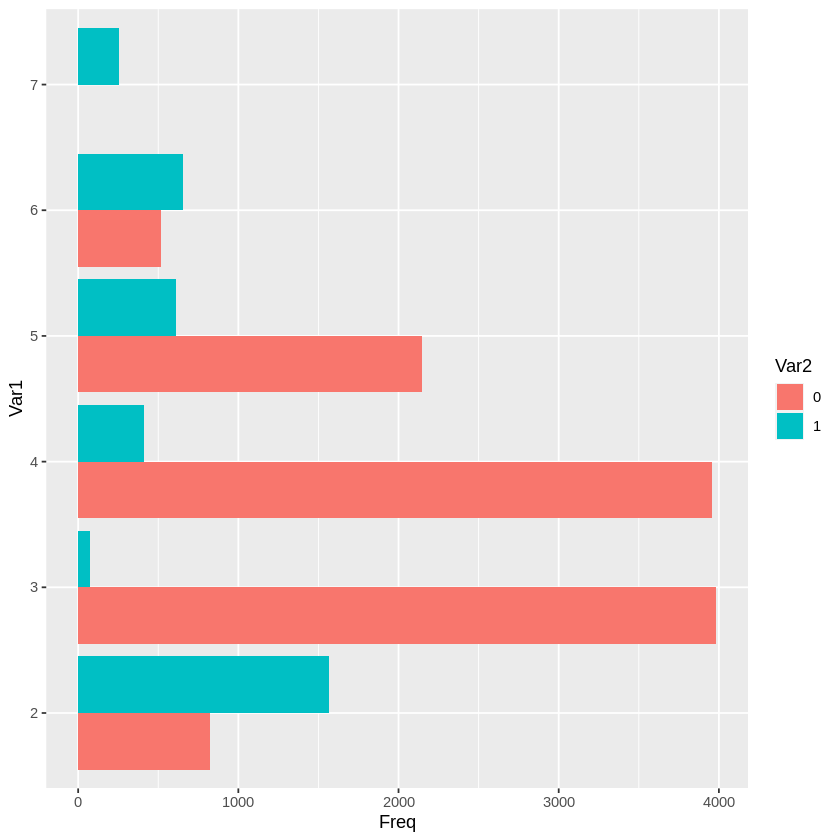

In [ ]:
# Create a contingency table of number of projects and attrition status
vis_3 <- table(data_set$number_project, data_set$left)

# Convert the table to a data frame for visualization
d_vis_3 <- as.data.frame(vis_3)

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a grouped bar plot using ggplot
p <- ggplot(d_vis_3, aes(x = Var1, y = Freq, fill = Var2)) +
  geom_bar(position = "dodge", stat = 'identity') +   # Use dodge position for grouped bars
  coord_flip()  # Flip the coordinates to make the plot horizontal

# Print the grouped bar plot
print(p)


**3g. Turnover V.S. Evaluation**

Summary:There is a biomodal distribution for those that had a turnover.
Employees with low performance tend to leave the company more,
surprisingly, employees with high performance also exhibit higher turnover rates, suggesting potential underlying issues affecting retention.
The sweet spot for employees that stayed is within 0.6-0.8 evaluation.

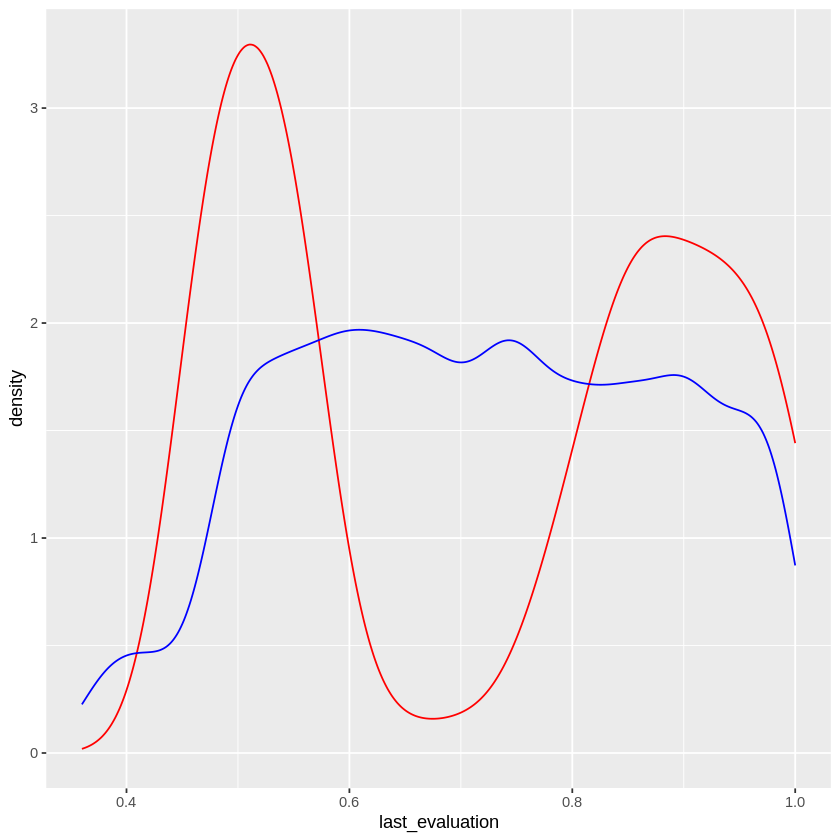

In [ ]:
# Kernel Density Plot

# Subset the data for employees who left and employees who stayed
left_data <- subset(data_set, left == 1)
stay_data <- subset(data_set, left == 0)

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a kernel density plot for last_evaluation variable
# Overlay density plots for employees who left and employees who stayed
ggplot() +
  geom_density(aes(x = last_evaluation), colour = "red", data = left_data) +  # Density plot for employees who left
  geom_density(aes(x = last_evaluation), colour = "blue", data = stay_data)   # Density plot for employees who stayed


**3h. Turnover V.S. AverageMonthlyHours**

Summary:

*   Another bi-modal distribution is observed among employees who left the company.
*   Employees who worked fewer hours (approximately 150 hours or less) were more likely to leave.
*   Conversely, employees who worked excessively long hours (around 250 hours or more) were also prone to leaving.
*   Generally, employees who left the company were either underworked or overworked.





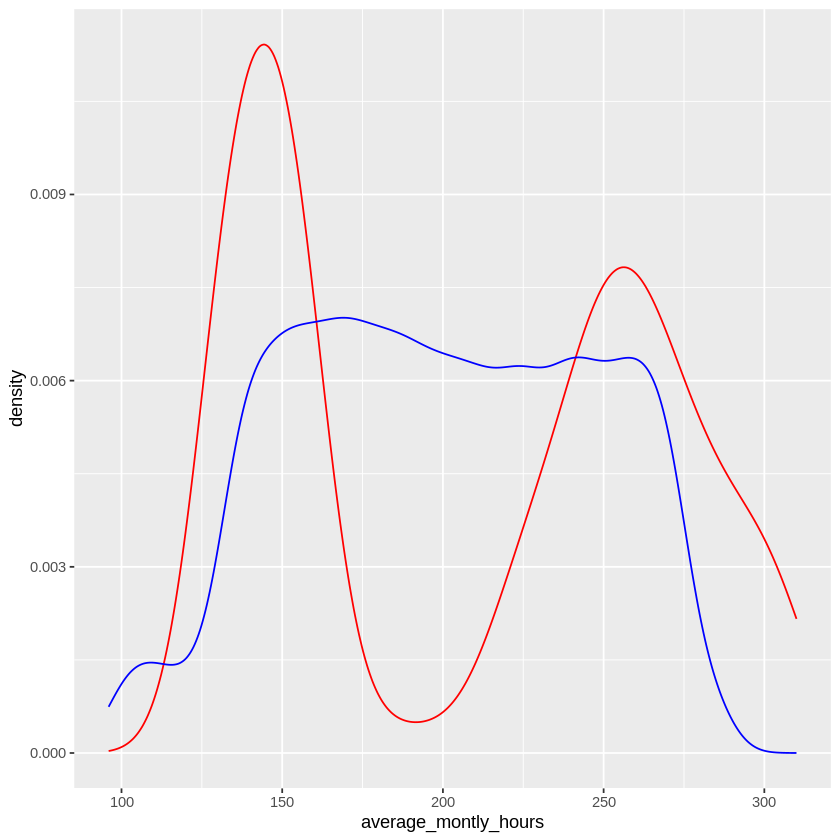

In [ ]:
#KDEPlot: Kernel Density Estimate Plot

# Create a kernel density estimate plot for average_montly_hours variable
# Overlay KDE plots for employees who left and employees who stayed
ggplot() +
  geom_density(aes(x = average_montly_hours), colour = "red", data = left_data) +  # KDE plot for employees who left
  geom_density(aes(x = average_montly_hours), colour = "blue", data = stay_data)   # KDE plot for employees who stayed

**3i. Turnover V.S. Satisfaction**

Summary:
*   The turnovered employees exhibit a tri-modal distribution.
*   Employees with extremely low satisfaction levels (0.2 or lower) were more likely to leave the company.
*   Employees with low satisfaction levels (between 0.3 and 0.5) were also more prone to leaving the company.
*   Surprisingly, employees with very high satisfaction levels (0.7 or higher) were also observed to leave the company more frequently.












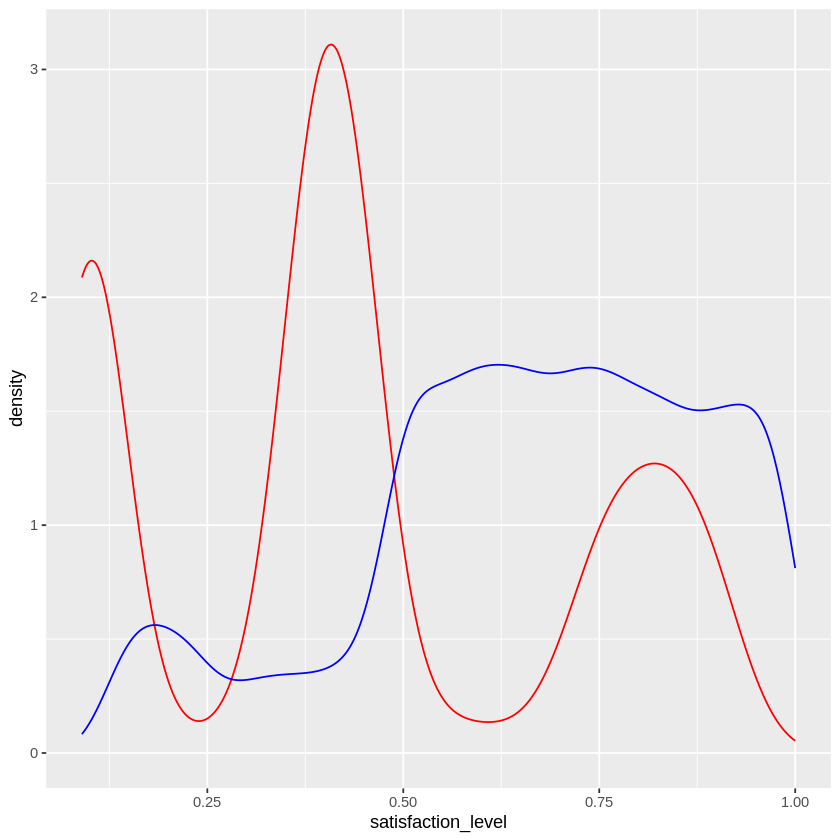

In [ ]:
#KDEPlot: Kernel Density Estimate Plot

# Create a kernel density estimate plot for satisfaction_level variable
# Overlay KDE plots for employees who left and employees who stayed
ggplot() +
  geom_density(aes(x = satisfaction_level), colour = "red", data = left_data) +  # KDE plot for employees who left
  geom_density(aes(x = satisfaction_level), colour = "blue", data = stay_data)   # KDE plot for employees who stayed

**3j. ProjectCount VS AverageMonthlyHours**

Summary:

*   There's a positive correlation between project count and average monthly hours; as project count increases, so does average monthly hours.
*   An interesting observation from the boxplot is the disparity in average monthly hours between employees who had turnover and those who did not.
*   Employees who did not have turnover displayed consistent average monthly hours, regardless of the increase in projects.
*   Conversely, employees who experienced turnover showed an increase in average monthly hours as the number of projects increased.




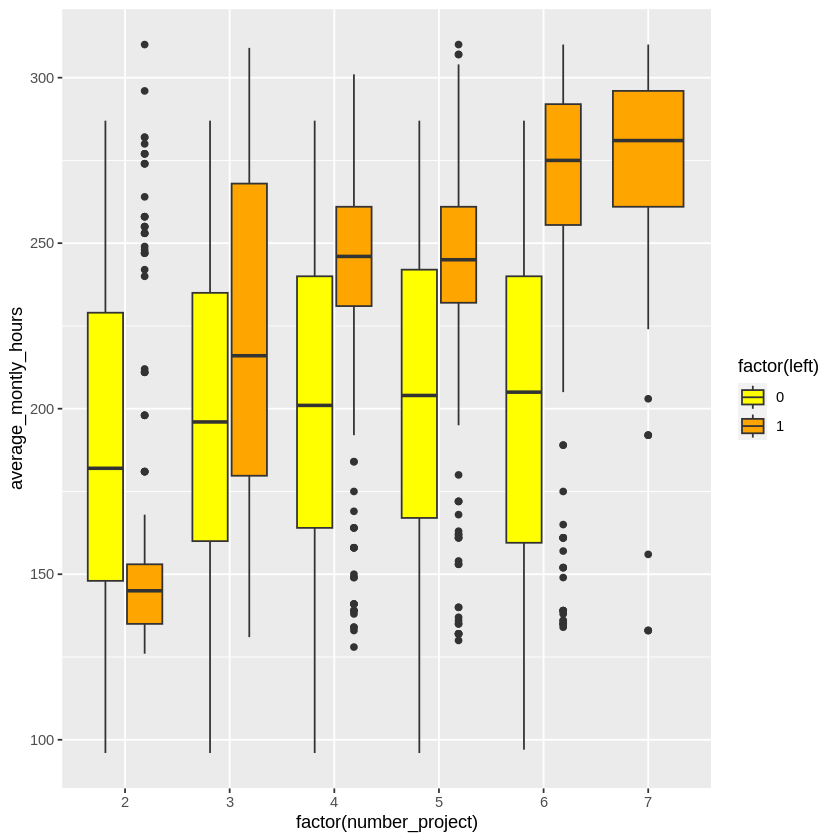

In [ ]:
# Project Count vs. Average Monthly Hours [BOXPLOT]

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a boxplot to visualize the relationship between project count, average monthly hours, and turnover status
# The x-axis represents the number of projects, the y-axis represents average monthly hours, and fill represents turnover status
# Yellow color represents employees who stayed, and orange represents employees who had turnover
p <- ggplot(data_set, aes(x = factor(number_project), y = average_montly_hours, fill = factor(left))) +
  geom_boxplot() +   # Create a boxplot
  scale_fill_manual(values = c("yellow", "orange"))  # Define colors for turnover status

# Print the boxplot
print(p)


**3k. ProjectCount VS Evaluation**

Summary:
*   The graph resembles the one above, showing similarities in patterns.
*   Notably, within the turnover group, there's a trend of increasing evaluation scores as the number of projects increases.
*   However, unlike the turnover group, employees in the non-turnover group maintain consistent evaluation scores regardless of the increase in project counts.





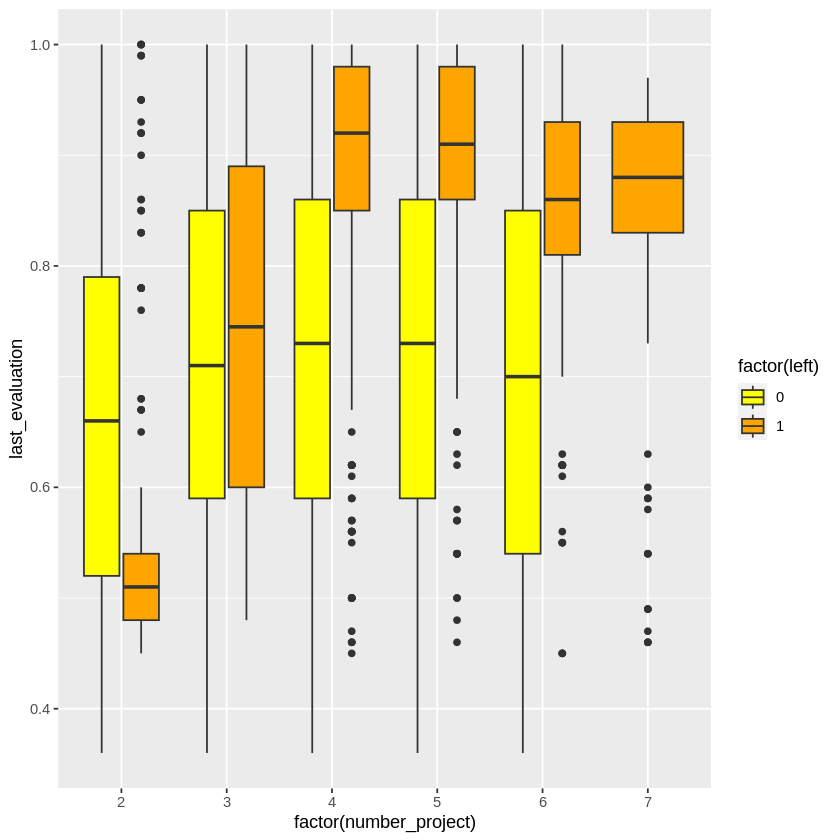

In [ ]:
# Project Count vs. Evaluation

# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a boxplot to visualize the relationship between project count, evaluation, and turnover status
# The x-axis represents the number of projects, the y-axis represents last evaluation, and fill represents turnover status
# Yellow color represents employees who stayed, and orange represents employees who had turnover
p <- ggplot(data_set, aes(x = factor(number_project), y = last_evaluation, fill = factor(left))) +
  geom_boxplot() +   # Create a boxplot
  scale_fill_manual(values = c("yellow", "orange"))  # Define colors for turnover status

# Print the boxplot
print(p)


**3l. Satisfaction VS Evaluation**

Summary: This is by far the most compelling graph.

There are 3 distinct clusters for employees who left the company

**Cluster 1 (Hard-working and Sad Employee):** These employees had satisfaction levels below 0.2 and evaluations greater than 0.75. This suggests that despite being good workers, they felt miserable in their roles.

**Cluster 2 (Bad and Sad Employee):** Employees in this cluster had satisfaction levels between approximately 0.35 to 0.45 and evaluations below approximately 0.58. They were likely poorly evaluated and felt unhappy at work.

**Cluster 3 (Hard-working and Happy Employee):** These employees had satisfaction levels between 0.7 to 1.0 and evaluations greater than 0.8. They could be considered "ideal" employees who enjoyed their work and received high performance evaluations.

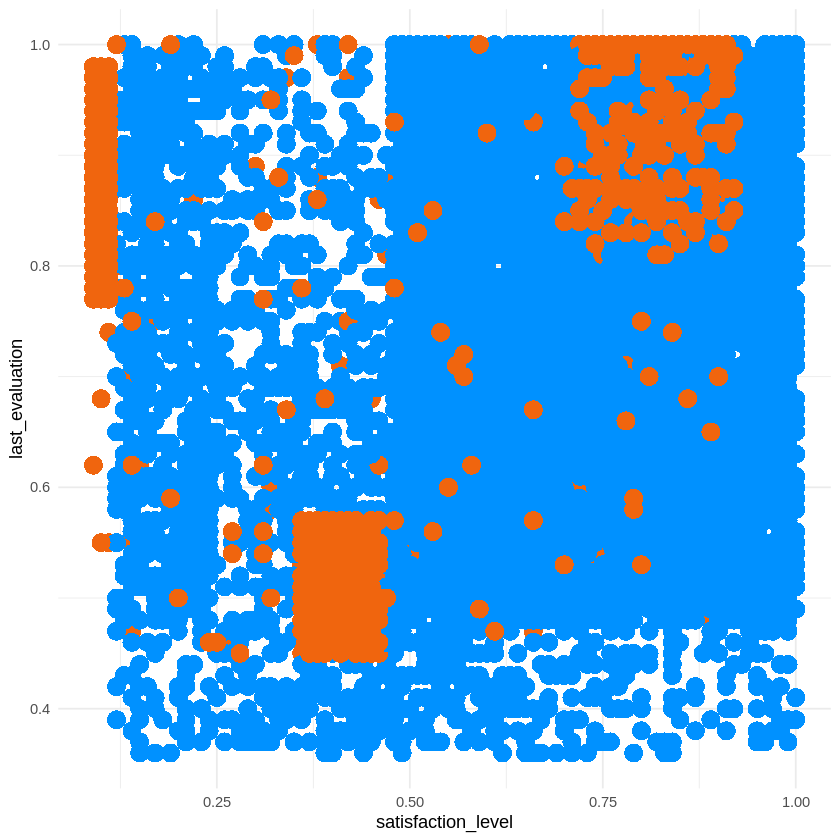

In [ ]:
# Load the ggplot2 package for data visualization
library(ggplot2)

# Create a scatter plot to visualize the relationship between satisfaction level, last evaluation, and turnover status
# X-axis represents satisfaction level, Y-axis represents last evaluation, and color represents turnover status
# Blue color represents employees who stayed, and orange represents employees who had turnover
p <- ggplot(data_set, aes(satisfaction_level, last_evaluation, color = left)) +
  geom_point(shape = 16, size = 5, show.legend = FALSE) +  # Scatter plot with customized point shape and size
  theme_minimal() +  # Apply minimal theme for aesthetic
  scale_color_gradient(low = "#0091ff", high = "#f0650e")  # Customize color gradient

# Print the scatter plot
print(p)


**Step 4: Data Modeling**



**4a. Modeling the Data: Logistic Regression Analysis**


Logistic Regression is a statistical method commonly used for binary classification problems, where the goal is to predict the likelihood of an event occurring. In the context of predicting employee attrition, Logistic Regression is a suitable choice because it predicts the probability of an employee leaving (1) or staying (0) based on input features.

Unlike linear regression, which predicts continuous outcomes, logistic regression models the probability of the response variable (attrition) belonging to each class (stay or leave) using a logistic (or sigmoid) function. This ensures that the predicted probabilities are bounded between 0 and 1.

Logistic Regression is preferred for this problem due to its interpretability. It allows us to understand how each predictor variable contributes to the likelihood of an employee leaving the company. The output of logistic regression provides insights into the probability of attrition, which can inform decision-making and intervention strategies for employee retention.

In [ ]:
# Creating training and test sets for logistic regression

# Calculate the sample size for training set
smp_size <- floor(0.75 * nrow(data_set))

# Set the seed for reproducibility
set.seed(123)

# Randomly sample indices for training set
train_ind <- sample(seq_len(nrow(data_set)), size = smp_size)

# Create training set using sampled indices
train <- data_set[train_ind, ]

# Create test set using remaining indices
test <- data_set[-train_ind, ]

# Display dimensions of test and training sets
dim(test)  # Dimension of test set
dim(train) # Dimension of training set


[1] 3750   10

[1] 11249    10

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
glm(formula = left ~ satisfaction_level + last_evaluation + average_montly_hours + 
    salary + role + number_project, family = binomial(), data = train)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -0.7840440  0.2110145  -3.716 0.000203 ***
satisfaction_level   -4.2025385  0.1114549 -37.706  < 2e-16 ***
last_evaluation       0.9274540  0.1668047   5.560 2.70e-08 ***
average_montly_hours  0.0049900  0.0005753   8.673  < 2e-16 ***
salarylow             1.7090708  0.1387421  12.318  < 2e-16 ***
salarymedium          1.2416796  0.1400003   8.869  < 2e-16 ***
rolehr                0.1688545  0.1473022   1.146 0.251665    
roleIT               -0.2035528  0.1365469  -1.491 0.136036    
rolemanagement       -0.4056506  0.1774022  -2.287 0.022218 *  
rolemarketing        -0.1612705  0.1491023  -1.082 0.279426    
roleproduct_mng      -0.2480778  0.1478343  -1.678 0.093332 .  
roleRandD            -0.6754246  0.1642285  -4.113 3.91

0 vs. 1,0.7804153


[1] "Accuracy:"         "0.757066666666667"
[1] "Precision:"        "0.698257080610022"
[1] "Recall:"           "0.502745098039216"


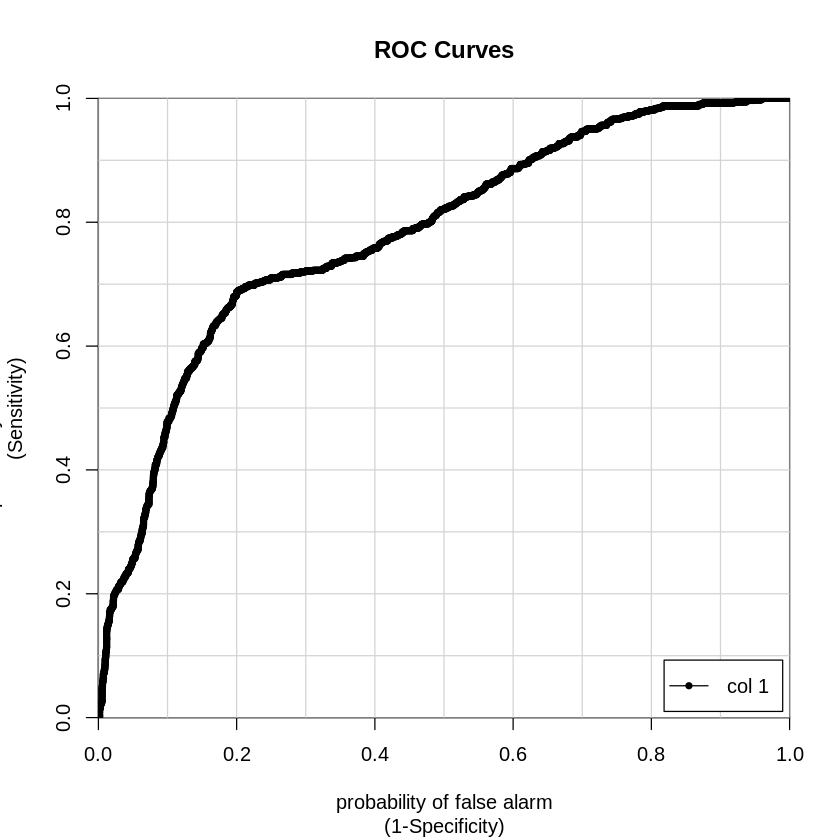

In [ ]:
#Training the model

# Install the packages
install.packages("gmodels")
install.packages("Hmisc")
install.packages("caTools")
install.packages("ROCR")

library(gmodels)
library (Hmisc)
library (caTools)
library (ROCR)

# Fit logistic regression model using training data
logit_model<-glm(left~satisfaction_level+last_evaluation+average_montly_hours+salary+role+number_project,data=train,binomial())

# Display summary of the logistic regression model
summary(logit_model)

# Predict probabilities of attrition for test data using the trained model
test$logit_model<-predict(logit_model,test)

# Calculate AUC-ROC and plot ROC curve
colAUC(test$logit_model,test$left, plotROC=TRUE)

# Define a threshold for classifying probabilities into 0 or 1
test$prediction<-ifelse(test$logit_model>=-.95,1,0)

# Create confusion matrix to evaluate model performance
conf_mat<-table(test$left,test$prediction)

# Calculate accuracy, precision, and recall
accuracy<-(conf_mat[1,1]+conf_mat[2,2])/(conf_mat[1,1]+conf_mat[2,2]+conf_mat[1,2]+conf_mat[2,1])
recall<-(conf_mat[2,2])/(conf_mat[1,2]+conf_mat[2,2])
precision<-(conf_mat[2,2])/(conf_mat[2,2]+conf_mat[2,1])

# Print model performance metrics
print(c("Accuracy:",accuracy))
print(c("Precision:",precision))
print(c("Recall:",recall))

**4b. Modeling the Data**

The Random Forest model outperformed the Logistic Regression model in terms of performance metrics.




Call:
 randomForest(formula = left ~ satisfaction_level + last_evaluation +      average_montly_hours + salary + role + number_project, data = train,      ntree = 500, mtry = 3, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 2.45%
Confusion matrix:
     0    1 class.error
0 8465  131  0.01523965
1  145 2508  0.05465511
[1] "Accuracy:" "0.9784"   
[1] "Precision:"        "0.954397394136808"
[1] "Recall:"           "0.957516339869281"


,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
satisfaction_level,93.55604,440.24079,329.22823,1754.28054
last_evaluation,36.66528,218.11343,211.62942,594.16095
average_montly_hours,79.97933,155.53644,170.81784,687.05462
salary,13.85519,60.24329,53.17074,53.65040
role,19.76941,78.02122,68.29235,97.19494
number_project,57.61964,247.43407,224.86881,859.48054


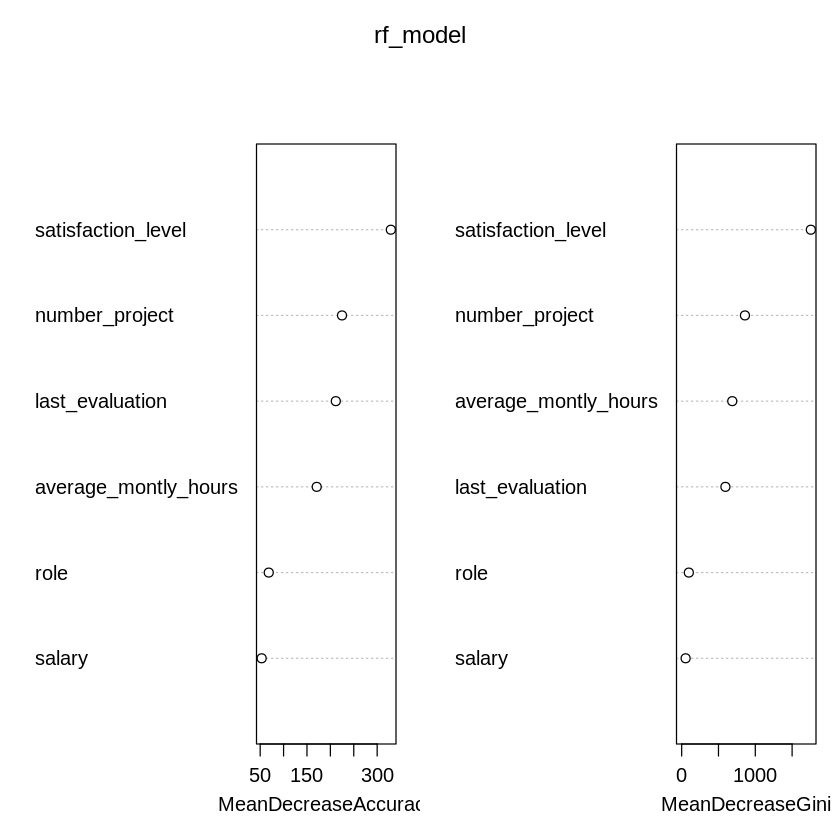

In [ ]:
# Convert 'left' variable to factor
train$left <- as.factor(train$left)
test$left <- as.factor(test$left)

# Train the Random Forest model
set.seed(123)  # for reproducibility
rf_model <- randomForest(left ~ satisfaction_level + last_evaluation + average_montly_hours + salary + role + number_project,
                         data = train,
                         ntree = 500,  # number of trees in the forest
                         mtry = 3,      # number of variables randomly sampled as candidates at each split
                         importance = TRUE)  # calculate variable importance

# Print the model summary
print(rf_model)

# Predict using the test data
rf_pred <- predict(rf_model, test)

# Evaluate model performance
conf_mat_rf <- table(test$left, rf_pred)
accuracy_rf <- sum(diag(conf_mat_rf)) / sum(conf_mat_rf)
precision_rf <- conf_mat_rf[2, 2] / sum(conf_mat_rf[, 2])
recall_rf <- conf_mat_rf[2, 2] / sum(conf_mat_rf[2, ])
print(c("Accuracy:", accuracy_rf))
print(c("Precision:", precision_rf))
print(c("Recall:", recall_rf))

# Plot variable importance
var_importance <- importance(rf_model)
var_importance
varImpPlot(rf_model)

**Step 5: Data Interpretation**

*   Employees tended to leave the company when they were either underworked (less than 150 hours per month or approximately 6 hours per day) or overworked (more than 250 hours per month or approximately 10 hours per day).

*   Both extremely high and low evaluations were associated with higher turnover rates among employees.

*   Employees with low to medium salaries comprised the majority of employee turnover.

*   Employees with 2, 6, or 7 projects were at a higher risk of leaving the company.

*   Employee satisfaction emerged as the most significant indicator of employee turnover.

*   Employees with 4 and 5 years of tenure at the company should be considered for high turnover rates.















